# 1. Import the data

In [1]:
#1 Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#1 Define path

path = r'/Users/shaheirjibin/Documents/Data Analytics/02 Data Analytics Immersion/04 Python Fundamentals for Data Analysts/Instacart Basket Analysis'

In [3]:
#1 Import df from Exercise 4.9

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

# 2. Consider any security implications

In [4]:
#2 Remove preview limit for showing columns

pd.options.display.max_columns = None

In [5]:
#2 Preview the head of imported df

df.head()

order_id user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329       1             1                   2                  8   
1   2539329       1             1                   2                  8   
2   2539329       1             1                   2                  8   
3   2539329       1             1                   2                  8   
4   2539329       1             1                   2                  8   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     0.0         196                  1          0   
1                     0.0       14084                  2          0   
2                     0.0       12427                  3          0   
3                     0.0       26088                  4          0   
4                     0.0       26405                  5          0   

                              product_name  aisle_id  department_id  prices  \
0                                     Soda        77              7     9.0   
1  Organic Unsweetened Vanilla Almond Milk        91             16    12.5   
2                      Original Beef Jerky        23             19     4.4   
3               Aged White Cheddar Popcorn        23             19     4.7   
4         XL Pick-A-Size Paper Towel Rolls        54             17     1.0   

     price_range_loc     busiest_day    busiest_days busiest_period_of_day  \
0  Mid-range product  Regularly busy  Regularly busy        Average orders   
1  Mid-range product  Regularly busy  Regularly busy        Average orders   
2  Low-range product  Regularly busy  Regularly busy        Average orders   
3  Low-range product  Regularly busy  Regularly busy        Average orders   
4  Low-range product  Regularly busy  Regularly busy        Average orders   

   max_order  loyalty_flag  mean_product_price spending_flag  \
0         10  New customer            6.367797   Low spender   
1         10  New customer            6.367797   Low spender   
2         10  New customer            6.367797   Low spender   
3         10  New customer            6.367797   Low spender   
4         10  New customer            6.367797   Low spender   

   median_days_since_prior_order order_frequency_flag first_name last_name  \
0                           20.0     Regular customer      Linda    Nguyen   
1                           20.0     Regular customer      Linda    Nguyen   
2                           20.0     Regular customer      Linda    Nguyen   
3                           20.0     Regular customer      Linda    Nguyen   
4                           20.0     Regular customer      Linda    Nguyen   

   gender    state  age date_joined  dependants marital_status  income _merge  
0  Female  Alabama   31  2019-02-17           3        married   40423   both  
1  Female  Alabama   31  2019-02-17           3        married   40423   both  
2  Female  Alabama   31  2019-02-17           3        married   40423   both  
3  Female  Alabama   31  2019-02-17           3        married   40423   both  
4  Female  Alabama   31  2019-02-17           3        married   40423   both

No columns needed to be dropped since these columns could be essential for this particular analysis for this task.

# 3a. Create a regional segmentation

In [6]:
#3a Create lists of states for the 4 regions

northeast = ['Maine', 'New Hampshire', 'Vermont', 
            'Massachusetts', 'Rhode Island', 'Connecticut', 
            'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 
           'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 
           'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 
         'Virginia', 'West Virginia', 'North Carolina', 
         'South Carolina', 'Georgia', 'Florida', 'Kentucky', 
         'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 
         'Texas', 'Arkansas', 'Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 
        'Colorado', 'Arizona', 'New Mexico', 'Alaska', 
        'Washington', 'Oregon', 'California', 'Hawaii']

In [7]:
#3a Create a region column for the lists made

df.loc[df['state'].isin(northeast), 'region'] = 'Northeast'
df.loc[df['state'].isin(midwest), 'region'] = 'Midwest'
df.loc[df['state'].isin(south), 'region'] = 'South'
df.loc[df['state'].isin(west), 'region'] = 'West'

In [8]:
#3a Check data values

df['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [9]:
#3a Preview df head

df.head()

order_id user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329       1             1                   2                  8   
1   2539329       1             1                   2                  8   
2   2539329       1             1                   2                  8   
3   2539329       1             1                   2                  8   
4   2539329       1             1                   2                  8   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     0.0         196                  1          0   
1                     0.0       14084                  2          0   
2                     0.0       12427                  3          0   
3                     0.0       26088                  4          0   
4                     0.0       26405                  5          0   

                              product_name  aisle_id  department_id  prices  \
0                                     Soda        77              7     9.0   
1  Organic Unsweetened Vanilla Almond Milk        91             16    12.5   
2                      Original Beef Jerky        23             19     4.4   
3               Aged White Cheddar Popcorn        23             19     4.7   
4         XL Pick-A-Size Paper Towel Rolls        54             17     1.0   

     price_range_loc     busiest_day    busiest_days busiest_period_of_day  \
0  Mid-range product  Regularly busy  Regularly busy        Average orders   
1  Mid-range product  Regularly busy  Regularly busy        Average orders   
2  Low-range product  Regularly busy  Regularly busy        Average orders   
3  Low-range product  Regularly busy  Regularly busy        Average orders   
4  Low-range product  Regularly busy  Regularly busy        Average orders   

   max_order  loyalty_flag  mean_product_price spending_flag  \
0         10  New customer            6.367797   Low spender   
1         10  New customer            6.367797   Low spender   
2         10  New customer            6.367797   Low spender   
3         10  New customer            6.367797   Low spender   
4         10  New customer            6.367797   Low spender   

   median_days_since_prior_order order_frequency_flag first_name last_name  \
0                           20.0     Regular customer      Linda    Nguyen   
1                           20.0     Regular customer      Linda    Nguyen   
2                           20.0     Regular customer      Linda    Nguyen   
3                           20.0     Regular customer      Linda    Nguyen   
4                           20.0     Regular customer      Linda    Nguyen   

   gender    state  age date_joined  dependants marital_status  income _merge  \
0  Female  Alabama   31  2019-02-17           3        married   40423   both   
1  Female  Alabama   31  2019-02-17           3        married   40423   both   
2  Female  Alabama   31  2019-02-17           3        married   40423   both   
3  Female  Alabama   31  2019-02-17           3        married   40423   both   
4  Female  Alabama   31  2019-02-17           3        married   40423   both   

  region  
0  South  
1  South  
2  South  
3  South  
4  South

# 3b. Compare spending habits between different regions

In [10]:
#3b Create a crosstab between 'region' and 'spending_flag' columns

region_spending_crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [11]:
#3b Preview the crosstab made

region_spending_crosstab

spending_flag  High spender  Low spender
region                                  
Midwest              155975      7441350
Northeast            108225      5614511
South                209691     10582194
West                 160354      8132559

The spending proportion between the high spenders and low spenders are about the same across the regions. The northeast has the lowest gap while the south has the largest gap.

# 4. Create an exclusion flag for low-activity customers

In [12]:
#4 Exclude customers where 'max_order' < 5 

df.loc[df['max_order'] < 5, 'exclusion_flag'] = 'Exclude'

#4 Keep customers where 'max_order' >= 5

df.loc[df['max_order'] >= 5, 'exclusion_flag'] = 'Keep'

In [13]:
#4 Preview df head

df.head()

order_id user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329       1             1                   2                  8   
1   2539329       1             1                   2                  8   
2   2539329       1             1                   2                  8   
3   2539329       1             1                   2                  8   
4   2539329       1             1                   2                  8   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     0.0         196                  1          0   
1                     0.0       14084                  2          0   
2                     0.0       12427                  3          0   
3                     0.0       26088                  4          0   
4                     0.0       26405                  5          0   

                              product_name  aisle_id  department_id  prices  \
0                                     Soda        77              7     9.0   
1  Organic Unsweetened Vanilla Almond Milk        91             16    12.5   
2                      Original Beef Jerky        23             19     4.4   
3               Aged White Cheddar Popcorn        23             19     4.7   
4         XL Pick-A-Size Paper Towel Rolls        54             17     1.0   

     price_range_loc     busiest_day    busiest_days busiest_period_of_day  \
0  Mid-range product  Regularly busy  Regularly busy        Average orders   
1  Mid-range product  Regularly busy  Regularly busy        Average orders   
2  Low-range product  Regularly busy  Regularly busy        Average orders   
3  Low-range product  Regularly busy  Regularly busy        Average orders   
4  Low-range product  Regularly busy  Regularly busy        Average orders   

   max_order  loyalty_flag  mean_product_price spending_flag  \
0         10  New customer            6.367797   Low spender   
1         10  New customer            6.367797   Low spender   
2         10  New customer            6.367797   Low spender   
3         10  New customer            6.367797   Low spender   
4         10  New customer            6.367797   Low spender   

   median_days_since_prior_order order_frequency_flag first_name last_name  \
0                           20.0     Regular customer      Linda    Nguyen   
1                           20.0     Regular customer      Linda    Nguyen   
2                           20.0     Regular customer      Linda    Nguyen   
3                           20.0     Regular customer      Linda    Nguyen   
4                           20.0     Regular customer      Linda    Nguyen   

   gender    state  age date_joined  dependants marital_status  income _merge  \
0  Female  Alabama   31  2019-02-17           3        married   40423   both   
1  Female  Alabama   31  2019-02-17           3        married   40423   both   
2  Female  Alabama   31  2019-02-17           3        married   40423   both   
3  Female  Alabama   31  2019-02-17           3        married   40423   both   
4  Female  Alabama   31  2019-02-17           3        married   40423   both   

  region exclusion_flag  
0  South           Keep  
1  South           Keep  
2  South           Keep  
3  South           Keep  
4  South           Keep

In [14]:
#4 Check values

df['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Keep       30964564
Exclude     1440295
Name: count, dtype: int64

In [15]:
#4 Check 'exclusion_flag' using crosstab

ef_check = pd.crosstab(df['exclusion_flag'], df['max_order'], dropna = False)

In [16]:
ef_check.to_clipboard()

Exclusion flag checked in Excel.

In [17]:
#4 Create a subset without 'exclude' rows

df_exclude = df[df['exclusion_flag'] == 'Keep']

In [18]:
#4 Check new values

df_exclude['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Keep    30964564
Name: count, dtype: int64

The rows with 'Exclude' has been successfully excluded.

In [19]:
#4 Export subset

df_exclude.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_high_activity_customers_only.pkl'))

# 5. Create profiling variables

# Age

In [20]:
#5 Check frequency within 'age' column

df_exclude['age'].value_counts(dropna = False)

age
79    508337
49    507879
48    506730
31    506218
64    504832
       ...  
60    461897
36    460649
66    454604
41    451269
25    449324
Name: count, Length: 64, dtype: int64

In [21]:
#5 Create age group profiling using 'age' column

df_exclude.loc[df_exclude['age'] <= 25, 'age_group'] = 'Young adult'
df_exclude.loc[(df_exclude['age'] > 25) & 
                    (df_exclude['age'] < 45), 'age_group'] = 'Adult'
df_exclude.loc[(df_exclude['age'] >= 45) & 
                    (df_exclude['age'] < 65), 'age_group'] = 'Older adult'
df_exclude.loc[df_exclude['age'] >= 65, 'age_group'] = 'Senior'

/var/folders/l1/ggt7tv8n4bd823d059sz60v00000gn/T/ipykernel_944/4233307057.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclude.loc[df_exclude['age'] <= 25, 'age_group'] = 'Young adult'


In [22]:
#5 Check frequency of created new column

df_exclude['age_group'].value_counts(dropna = False)

age_group
Older adult    9690051
Adult          9214451
Senior         8195544
Young adult    3864518
Name: count, dtype: int64

# Income

In [23]:
#5 Check income frequency

df_exclude['income'].value_counts(dropna = False)

income
72344     4395
112610    4242
57501     4136
115620    3831
36163     3657
          ... 
48493        5
47901        5
90002        5
44942        5
147660       2
Name: count, Length: 96069, dtype: int64

In [24]:
#5 Create income group based on 'income' column

df_exclude.loc[df_exclude['income'] <= 50000, 'income_group'] = 'Low'
df_exclude.loc[(df_exclude['income'] > 50000) & 
                    (df_exclude['income'] <= 100000), 'income_group'] = 'Middle'
df_exclude.loc[df_exclude['income'] > 100000, 'income_group'] = 'High'

/var/folders/l1/ggt7tv8n4bd823d059sz60v00000gn/T/ipykernel_944/978857880.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclude.loc[df_exclude['income'] <= 50000, 'income_group'] = 'Low'


In [25]:
#5 Check frequency of 'income_group'

df_exclude['income_group'].value_counts(dropna = False)

income_group
High      14207028
Middle    13394982
Low        3362554
Name: count, dtype: int64

# Grouping items into departments

In [26]:
#5 Check 'department_id' frequency

df_exclude['department_id'].value_counts(dropna = False)

department_id
4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: count, dtype: int64

In [27]:
#5 Create a department sample to name the 'department_id' values

df_department = df_exclude[['product_name', 'department_id']]

In [28]:
df_department

product_name  department_id
0                                            Soda              7
1         Organic Unsweetened Vanilla Almond Milk             16
2                             Original Beef Jerky             19
3                      Aged White Cheddar Popcorn             19
4                XL Pick-A-Size Paper Towel Rolls             17
...                                           ...            ...
32404854                             Tomato Paste              9
32404855          Brownie Crunch High Protein Bar             19
32404856    High Protein Bar Chunky Peanut Butter             19
32404857      Chocolate Peanut Butter Protein Bar             19
32404858      Roasted & Salted Shelled Pistachios             19

[30964564 rows x 2 columns]

In [29]:
sample_products = df_department.groupby('department_id')['product_name'].first().reset_index()

In [30]:
sample_products

department_id                                       product_name
0               1                                           Pad Thai
1               2                           Zero Calorie Tonic Water
2               3                      Organic White English Muffins
3               4                             Bag of Organic Bananas
4               5                       Private Selection Pinot Noir
5               6                                Garlic Pepper Ramen
6               7                                               Soda
7               8                     Ear Candy (Cow Ears) Dog Chews
8               9                                    Garlic Couscous
9              10                                        Dried Mango
10             11                   Sugarfree Peppermint Chewing Gum
11             12                             Organic Turkey Burgers
12             13                               Creamy Almond Butter
13             14                              Cinnamon Toast Crunch
14             15                   Wild Albacore Tuna No Salt Added
15             16            Organic Unsweetened Vanilla Almond Milk
16             17                   XL Pick-A-Size Paper Towel Rolls
17             18               Kids Sensible Foods Broccoli Littles
18             19                                Original Beef Jerky
19             20                                     Roasted Turkey
20             21  Strained Non-Fat Strawberry Icelandic Style Sk...

In [31]:
#5 Group certain products into 'Food', 'Beverage' and 'Others'

df_exclude.loc[df_exclude['department_id'].isin([1, 3, 4, 6, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21]), 'department'] = 'Food'
df_exclude.loc[df_exclude['department_id'].isin([2, 5, 7, 16]), 'department'] = 'Beverage'
df_exclude.loc[df_exclude['department_id'].isin([8, 17]), 'department'] = 'Other'

/var/folders/l1/ggt7tv8n4bd823d059sz60v00000gn/T/ipykernel_944/131071193.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclude.loc[df_exclude['department_id'].isin([1, 3, 4, 6, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21]), 'department'] = 'Food'


In [32]:
df_exclude['department'].value_counts(dropna = False)

department
Food        22243526
Beverage     7928121
Other         792917
Name: count, dtype: int64

In [33]:
df_exclude.head()

order_id user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329       1             1                   2                  8   
1   2539329       1             1                   2                  8   
2   2539329       1             1                   2                  8   
3   2539329       1             1                   2                  8   
4   2539329       1             1                   2                  8   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     0.0         196                  1          0   
1                     0.0       14084                  2          0   
2                     0.0       12427                  3          0   
3                     0.0       26088                  4          0   
4                     0.0       26405                  5          0   

                              product_name  aisle_id  department_id  prices  \
0                                     Soda        77              7     9.0   
1  Organic Unsweetened Vanilla Almond Milk        91             16    12.5   
2                      Original Beef Jerky        23             19     4.4   
3               Aged White Cheddar Popcorn        23             19     4.7   
4         XL Pick-A-Size Paper Towel Rolls        54             17     1.0   

     price_range_loc     busiest_day    busiest_days busiest_period_of_day  \
0  Mid-range product  Regularly busy  Regularly busy        Average orders   
1  Mid-range product  Regularly busy  Regularly busy        Average orders   
2  Low-range product  Regularly busy  Regularly busy        Average orders   
3  Low-range product  Regularly busy  Regularly busy        Average orders   
4  Low-range product  Regularly busy  Regularly busy        Average orders   

   max_order  loyalty_flag  mean_product_price spending_flag  \
0         10  New customer            6.367797   Low spender   
1         10  New customer            6.367797   Low spender   
2         10  New customer            6.367797   Low spender   
3         10  New customer            6.367797   Low spender   
4         10  New customer            6.367797   Low spender   

   median_days_since_prior_order order_frequency_flag first_name last_name  \
0                           20.0     Regular customer      Linda    Nguyen   
1                           20.0     Regular customer      Linda    Nguyen   
2                           20.0     Regular customer      Linda    Nguyen   
3                           20.0     Regular customer      Linda    Nguyen   
4                           20.0     Regular customer      Linda    Nguyen   

   gender    state  age date_joined  dependants marital_status  income _merge  \
0  Female  Alabama   31  2019-02-17           3        married   40423   both   
1  Female  Alabama   31  2019-02-17           3        married   40423   both   
2  Female  Alabama   31  2019-02-17           3        married   40423   both   
3  Female  Alabama   31  2019-02-17           3        married   40423   both   
4  Female  Alabama   31  2019-02-17           3        married   40423   both   

  region exclusion_flag age_group income_group department  
0  South           Keep     Adult          Low   Beverage  
1  South           Keep     Adult          Low   Beverage  
2  South           Keep     Adult          Low       Food  
3  South           Keep     Adult          Low       Food  
4  South           Keep     Adult          Low      Other

# Number of dependants

In [34]:
df_exclude.describe()

order_id  order_number  orders_day_of_week  order_hour_of_day  \
count  3.096456e+07  3.096456e+07        3.096456e+07       3.096456e+07   
mean   1.710317e+06  1.783414e+01        2.741397e+00       1.341098e+01   
min    2.000000e+00  1.000000e+00        0.000000e+00       0.000000e+00   
25%    8.554120e+05  5.000000e+00        1.000000e+00       1.000000e+01   
50%    1.710404e+06  1.200000e+01        3.000000e+00       1.300000e+01   
75%    2.565206e+06  2.500000e+01        5.000000e+00       1.600000e+01   
max    3.421083e+06  9.900000e+01        6.000000e+00       2.300000e+01   
std    9.873785e+05  1.763442e+01        2.089254e+00       4.248845e+00   

       days_since_prior_order    product_id  add_to_cart_order     reordered  \
count            3.096456e+07  3.096456e+07       3.096456e+07  3.096456e+07   
mean             1.023032e+01  2.559850e+04       8.363038e+00  6.061019e-01   
min              0.000000e+00  1.000000e+00       1.000000e+00  0.000000e+00   
25%              4.000000e+00  1.354400e+04       3.000000e+00  0.000000e+00   
50%              7.000000e+00  2.528800e+04       6.000000e+00  1.000000e+00   
75%              1.400000e+01  3.794700e+04       1.100000e+01  1.000000e+00   
max              3.000000e+01  4.968800e+04       1.450000e+02  1.000000e+00   
std              8.693523e+00  1.408096e+04       7.135399e+00  4.886127e-01   

           aisle_id  department_id        prices     max_order  \
count  3.096456e+07   3.096456e+07  3.096456e+07  3.096456e+07   
mean   7.118859e+01   9.922365e+00  1.193352e+01  3.442569e+01   
min    1.000000e+00   1.000000e+00  1.000000e+00  5.000000e+00   
25%    3.100000e+01   4.000000e+00  4.200000e+00  1.400000e+01   
50%    8.300000e+01   9.000000e+00  7.400000e+00  2.800000e+01   
75%    1.070000e+02   1.600000e+01  1.130000e+01  4.800000e+01   
max    1.340000e+02   2.100000e+01  9.999900e+04  9.900000e+01   
std    3.822194e+01   6.282441e+00  4.913444e+02  2.489504e+01   

       mean_product_price  median_days_since_prior_order           age  \
count        3.096456e+07                   3.096456e+07  3.096456e+07   
mean         1.193352e+01                   9.337764e+00  4.946803e+01   
min          1.000000e+00                   0.000000e+00  1.800000e+01   
25%          7.392889e+00                   6.000000e+00  3.300000e+01   
50%          7.825143e+00                   7.000000e+00  4.900000e+01   
75%          8.249596e+00                   1.100000e+01  6.500000e+01   
max          1.500694e+04                   3.000000e+01  8.100000e+01   
std          7.992284e+01                   6.077206e+00  1.848528e+01   

                         date_joined    dependants        income  
count                       30964564  3.096456e+07  3.096456e+07  
mean   2018-08-16 15:24:26.241062400  1.501819e+00  9.967587e+04  
min              2017-01-01 00:00:00  0.000000e+00  2.590300e+04  
25%              2017-10-22 00:00:00  1.000000e+00  6.729200e+04  
50%              2018-08-16 00:00:00  2.000000e+00  9.676500e+04  
75%              2019-06-09 00:00:00  3.000000e+00  1.281020e+05  
max              2020-04-01 00:00:00  3.000000e+00  5.939010e+05  
std                              NaN  1.118896e+00  4.314187e+04

In [35]:
#5 Group the 'dependants_flag' by Yes or No

df_exclude.loc[df_exclude['dependants'] == 0, 'dependants_flag'] = 'No'
df_exclude.loc[df_exclude['dependants'] > 0, 'dependants_flag'] = 'Yes'

/var/folders/l1/ggt7tv8n4bd823d059sz60v00000gn/T/ipykernel_944/3322209617.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclude.loc[df_exclude['dependants'] == 0, 'dependants_flag'] = 'No'


In [36]:
#5 Check frequency

df_exclude['dependants_flag'].value_counts(dropna = False)

dependants_flag
Yes    23224883
No      7739681
Name: count, dtype: int64

# 6. Create visualizations to show distributions of profiles

# Age groups

In [37]:
#6 Create a sample with 'age_group' column

age_group_sample = df_exclude['age_group'].value_counts()

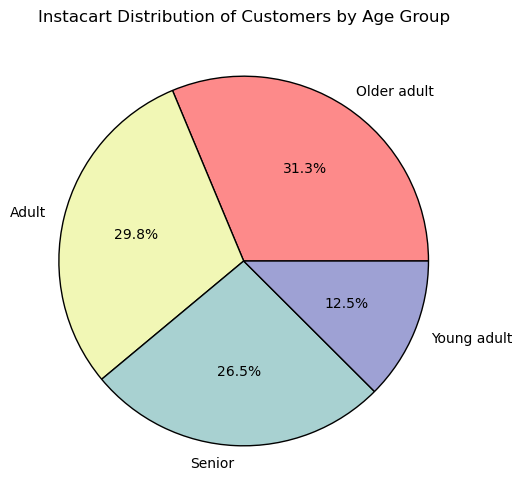

In [38]:
#6 Create a pie chart for this visualization

plt.figure(figsize=(6, 6)) # Control size of chart
plt.pie(age_group_sample, 
        labels = age_group_sample.index, 
        autopct='%.1f%%', # Show percentage to 1 d.p
        colors = ['#FD8A8A', '#F1F7B5', '#A8D1D1', '#9EA1D4'], # colour palette
        wedgeprops = {'edgecolor' : 'black'}) # borders
plt.title('Instacart Distribution of Customers by Age Group') # title
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_age_groups.png'), bbox_inches = 'tight') # Save
plt.show()

# Income groups

In [39]:
#6 Create a sample with 'income_group' column

income_group_sample = df_exclude['income_group'].value_counts()

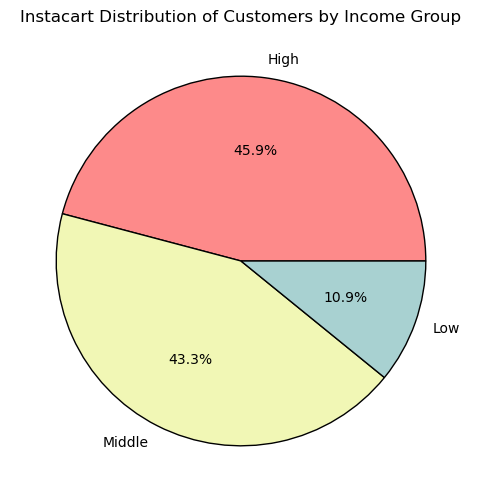

In [40]:
#6 Create a pie chart for this visualization

plt.figure(figsize=(6, 6)) # Control size of chart
plt.pie(income_group_sample, 
        labels = income_group_sample.index, 
        autopct='%.1f%%', # Show percentage to 1 d.p
        colors = ['#FD8A8A', '#F1F7B5', '#A8D1D1', '#9EA1D4'], # colour palette
        wedgeprops = {'edgecolor' : 'black'}) # borders
plt.title('Instacart Distribution of Customers by Income Group') # title
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_income_group.png'), bbox_inches = 'tight') # Save
plt.show()

# 7. Aggregate the max, mean, and min variables on a customer-profile level

# Aggregration based on order frequency

In [41]:
#7 Find min, mean and max for order frequency

order_frequency_stats = df_exclude.groupby('order_frequency_flag')['median_days_since_prior_order'].agg(['min', 'mean', 'max'])

In [42]:
#7 Show order frequency stats

order_frequency_stats

min       mean   max
order_frequency_flag                       
Frequent customer      0.0   6.253892  10.0
Regular customer      10.5  17.160055  30.0

# Aggregration based on expenditure

In [43]:
#7 Find min, mean and max for expenditure for each customer

expenditure_stats = df_exclude.groupby(['user_id'])['prices'].agg(['min', 'mean', 'max']).reset_index()

In [44]:
#7 Show expenditure stats

expenditure_stats

user_id  min      mean   max
0            1  1.0  6.367797  14.0
1           10  1.0  8.651049  24.2
2          100  2.3  9.859259  21.6
3         1000  1.2  8.407767  15.0
4        10000  1.2  8.045421  24.2
...        ...  ...       ...   ...
162626   99994  1.1  8.504878  14.3
162627   99995  1.2  7.958000  21.3
162628   99996  1.1  7.410938  15.0
162629   99998  1.8  9.052381  21.1
162630   99999  1.1  7.289970  24.2

[162631 rows x 4 columns]

# 8. Customer profiles in different regions comparison

In [45]:
#8 Import departments dataframe

dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'))

In [46]:
#8 View df

dep

department_id       1      2       3        4        5              6  \
0    department  frozen  other  bakery  produce  alcohol  international   

           7     8                9    10             11            12  \
0  beverages  pets  dry goods pasta  bulk  personal care  meat seafood   

       13         14            15          16         17      18      19  \
0  pantry  breakfast  canned goods  dairy eggs  household  babies  snacks   

     20       21  
0  deli  missing

In [47]:
#8 Transpose df from row to column

dep_t = dep.T

In [48]:
dep_t = dep_t.reset_index()

In [49]:
dep_t

index                0
0   department_id       department
1               1           frozen
2               2            other
3               3           bakery
4               4          produce
5               5          alcohol
6               6    international
7               7        beverages
8               8             pets
9               9  dry goods pasta
10             10             bulk
11             11    personal care
12             12     meat seafood
13             13           pantry
14             14        breakfast
15             15     canned goods
16             16       dairy eggs
17             17        household
18             18           babies
19             19           snacks
20             20             deli
21             21          missing

In [50]:
#8 Copy row 0, remove it and assign header row
new_header = dep_t.iloc[0]
dep_t = dep_t[1:]
dep_t.columns = new_header

In [51]:
dep_t

0  department_id       department
1              1           frozen
2              2            other
3              3           bakery
4              4          produce
5              5          alcohol
6              6    international
7              7        beverages
8              8             pets
9              9  dry goods pasta
10            10             bulk
11            11    personal care
12            12     meat seafood
13            13           pantry
14            14        breakfast
15            15     canned goods
16            16       dairy eggs
17            17        household
18            18           babies
19            19           snacks
20            20             deli
21            21          missing

In [52]:
#8 Rename 'department' column in df_exclude to 'department_general'

df_exclude.rename(columns={'department': 'department_general'}, inplace=True)

/var/folders/l1/ggt7tv8n4bd823d059sz60v00000gn/T/ipykernel_944/953977481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exclude.rename(columns={'department': 'department_general'}, inplace=True)


In [53]:
df_exclude

order_id user_id  order_number  orders_day_of_week  \
0          2539329       1             1                   2   
1          2539329       1             1                   2   
2          2539329       1             1                   2   
3          2539329       1             1                   2   
4          2539329       1             1                   2   
...            ...     ...           ...                 ...   
32404854   2977660  206209            13                   1   
32404855   2977660  206209            13                   1   
32404856   2977660  206209            13                   1   
32404857   2977660  206209            13                   1   
32404858   2977660  206209            13                   1   

          order_hour_of_day  days_since_prior_order  product_id  \
0                         8                     0.0         196   
1                         8                     0.0       14084   
2                         8                     0.0       12427   
3                         8                     0.0       26088   
4                         8                     0.0       26405   
...                     ...                     ...         ...   
32404854                 12                     7.0       14197   
32404855                 12                     7.0       38730   
32404856                 12                     7.0       31477   
32404857                 12                     7.0        6567   
32404858                 12                     7.0       22920   

          add_to_cart_order  reordered  \
0                         1          0   
1                         2          0   
2                         3          0   
3                         4          0   
4                         5          0   
...                     ...        ...   
32404854                  5          1   
32404855                  6          0   
32404856                  7          0   
32404857                  8          0   
32404858                  9          0   

                                     product_name  aisle_id  department_id  \
0                                            Soda        77              7   
1         Organic Unsweetened Vanilla Almond Milk        91             16   
2                             Original Beef Jerky        23             19   
3                      Aged White Cheddar Popcorn        23             19   
4                XL Pick-A-Size Paper Towel Rolls        54             17   
...                                           ...       ...            ...   
32404854                             Tomato Paste         9              9   
32404855          Brownie Crunch High Protein Bar         3             19   
32404856    High Protein Bar Chunky Peanut Butter         3             19   
32404857      Chocolate Peanut Butter Protein Bar         3             19   
32404858      Roasted & Salted Shelled Pistachios       117             19   

          prices    price_range_loc     busiest_day    busiest_days  \
0            9.0  Mid-range product  Regularly busy  Regularly busy   
1           12.5  Mid-range product  Regularly busy  Regularly busy   
2            4.4  Low-range product  Regularly busy  Regularly busy   
3            4.7  Low-range product  Regularly busy  Regularly busy   
4            1.0  Low-range product  Regularly busy  Regularly busy   
...          ...                ...             ...             ...   
32404854     5.6  Mid-range product  Regularly busy    Busiest days   
32404855     5.9  Mid-range product  Regularly busy    Busiest days   
32404856     4.2  Low-range product  Regularly busy    Busiest days   
32404857     4.9  Low-range product  Regularly busy    Busiest days   
32404858     1.7  Low-range product  Regularly busy    Busiest days   

         busiest_period_of_day  max_order      loyalty_flag  \
0               Average orders         10      New customer   
1              

In [54]:
#8 Drop column '_merge'

df_exclude = df_exclude.drop(columns=['_merge'])

In [55]:
# Convert department_id type

dep_t['department_id'] = dep_t['department_id'].astype('int64')

/var/folders/l1/ggt7tv8n4bd823d059sz60v00000gn/T/ipykernel_944/92399975.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dep_t['department_id'] = dep_t['department_id'].astype('int64')


In [56]:
#8 Merge 'department_id' from 'dep_t' to 'df_exclude'

df_merge = df_exclude.merge(dep_t, on = 'department_id', indicator = True)

In [57]:
df_merge.head()

order_id user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329       1             1                   2                  8   
1   2539329       1             1                   2                  8   
2   2539329       1             1                   2                  8   
3   2539329       1             1                   2                  8   
4   2539329       1             1                   2                  8   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     0.0         196                  1          0   
1                     0.0       14084                  2          0   
2                     0.0       12427                  3          0   
3                     0.0       26088                  4          0   
4                     0.0       26405                  5          0   

                              product_name  aisle_id  department_id  prices  \
0                                     Soda        77              7     9.0   
1  Organic Unsweetened Vanilla Almond Milk        91             16    12.5   
2                      Original Beef Jerky        23             19     4.4   
3               Aged White Cheddar Popcorn        23             19     4.7   
4         XL Pick-A-Size Paper Towel Rolls        54             17     1.0   

     price_range_loc     busiest_day    busiest_days busiest_period_of_day  \
0  Mid-range product  Regularly busy  Regularly busy        Average orders   
1  Mid-range product  Regularly busy  Regularly busy        Average orders   
2  Low-range product  Regularly busy  Regularly busy        Average orders   
3  Low-range product  Regularly busy  Regularly busy        Average orders   
4  Low-range product  Regularly busy  Regularly busy        Average orders   

   max_order  loyalty_flag  mean_product_price spending_flag  \
0         10  New customer            6.367797   Low spender   
1         10  New customer            6.367797   Low spender   
2         10  New customer            6.367797   Low spender   
3         10  New customer            6.367797   Low spender   
4         10  New customer            6.367797   Low spender   

   median_days_since_prior_order order_frequency_flag first_name last_name  \
0                           20.0     Regular customer      Linda    Nguyen   
1                           20.0     Regular customer      Linda    Nguyen   
2                           20.0     Regular customer      Linda    Nguyen   
3                           20.0     Regular customer      Linda    Nguyen   
4                           20.0     Regular customer      Linda    Nguyen   

   gender    state  age date_joined  dependants marital_status  income region  \
0  Female  Alabama   31  2019-02-17           3        married   40423  South   
1  Female  Alabama   31  2019-02-17           3        married   40423  South   
2  Female  Alabama   31  2019-02-17           3        married   40423  South   
3  Female  Alabama   31  2019-02-17           3        married   40423  South   
4  Female  Alabama   31  2019-02-17           3        married   40423  South   

  exclusion_flag age_group income_group department_general dependants_flag  \
0           Keep     Adult          Low           Beverage             Yes   
1           Keep     Adult          Low           Beverage             Yes   
2           Keep     Adult          Low               Food             Yes   
3           Keep     Adult          Low               Food             Yes   
4           Keep     Adult          Low              Other             Yes   

   department _merge  
0   beverages   both  
1  dairy eggs   both  
2      snacks   both  
3      snacks   both  
4   household   both

In [58]:
#8 Check the frequency of new merge flag

df_merge['_merge'].value_counts(dropna = False)

_merge
both          30964564
left_only            0
right_only           0
Name: count, dtype: int64

In [59]:
df_merge.head()

order_id user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329       1             1                   2                  8   
1   2539329       1             1                   2                  8   
2   2539329       1             1                   2                  8   
3   2539329       1             1                   2                  8   
4   2539329       1             1                   2                  8   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     0.0         196                  1          0   
1                     0.0       14084                  2          0   
2                     0.0       12427                  3          0   
3                     0.0       26088                  4          0   
4                     0.0       26405                  5          0   

                              product_name  aisle_id  department_id  prices  \
0                                     Soda        77              7     9.0   
1  Organic Unsweetened Vanilla Almond Milk        91             16    12.5   
2                      Original Beef Jerky        23             19     4.4   
3               Aged White Cheddar Popcorn        23             19     4.7   
4         XL Pick-A-Size Paper Towel Rolls        54             17     1.0   

     price_range_loc     busiest_day    busiest_days busiest_period_of_day  \
0  Mid-range product  Regularly busy  Regularly busy        Average orders   
1  Mid-range product  Regularly busy  Regularly busy        Average orders   
2  Low-range product  Regularly busy  Regularly busy        Average orders   
3  Low-range product  Regularly busy  Regularly busy        Average orders   
4  Low-range product  Regularly busy  Regularly busy        Average orders   

   max_order  loyalty_flag  mean_product_price spending_flag  \
0         10  New customer            6.367797   Low spender   
1         10  New customer            6.367797   Low spender   
2         10  New customer            6.367797   Low spender   
3         10  New customer            6.367797   Low spender   
4         10  New customer            6.367797   Low spender   

   median_days_since_prior_order order_frequency_flag first_name last_name  \
0                           20.0     Regular customer      Linda    Nguyen   
1                           20.0     Regular customer      Linda    Nguyen   
2                           20.0     Regular customer      Linda    Nguyen   
3                           20.0     Regular customer      Linda    Nguyen   
4                           20.0     Regular customer      Linda    Nguyen   

   gender    state  age date_joined  dependants marital_status  income region  \
0  Female  Alabama   31  2019-02-17           3        married   40423  South   
1  Female  Alabama   31  2019-02-17           3        married   40423  South   
2  Female  Alabama   31  2019-02-17           3        married   40423  South   
3  Female  Alabama   31  2019-02-17           3        married   40423  South   
4  Female  Alabama   31  2019-02-17           3        married   40423  South   

  exclusion_flag age_group income_group department_general dependants_flag  \
0           Keep     Adult          Low           Beverage             Yes   
1           Keep     Adult          Low           Beverage             Yes   
2           Keep     Adult          Low               Food             Yes   
3           Keep     Adult          Low               Food             Yes   
4           Keep     Adult          Low              Other             Yes   

   department _merge  
0   beverages   both  
1  dairy eggs   both  
2      snacks   both  
3      snacks   both  
4   household   both

# Distribution profiles by Region

# Income Groups

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a

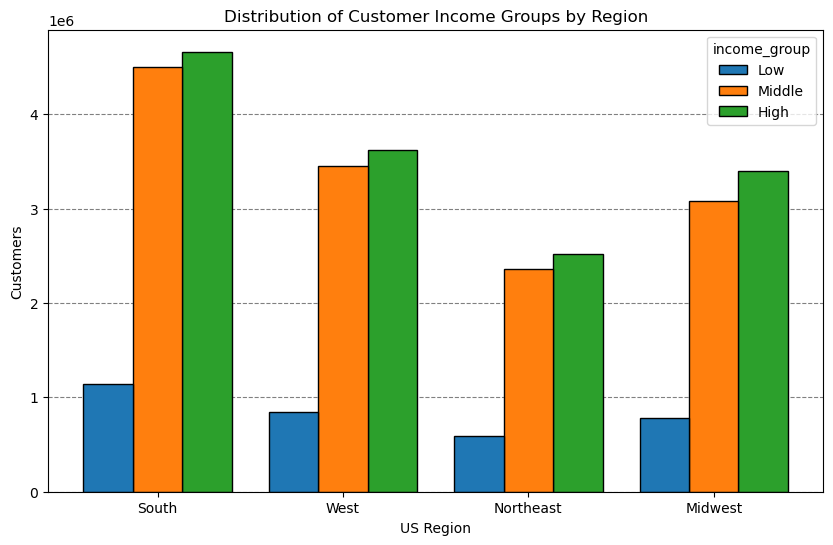

In [60]:
# Create a histogram to show income groups by region

plt.figure(figsize=(10, 6))
sns.histplot(data=df_merge, x='region', hue='income_group', multiple='dodge', shrink=.8, alpha=1)

# Overlay a grid behind the bars

plt.gca().set_axisbelow(True) 

# Ensure grid is behind bars

plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting

plt.title('Distribution of Customer Income Groups by Region')
plt.ylabel('Customers')
plt.xlabel('US Region')

# Export the viz

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_groups_by_region.png'), bbox_inches = 'tight')
plt.show()

In [61]:
#8 View histogram stats using crosstab

pd.crosstab(df_merge['income_group'], df_merge['region'], dropna = False)

region        Midwest  Northeast    South     West
income_group                                      
High          3400093    2516484  4663571  3626880
Low            783764     587137  1142572   849081
Middle        3077656    2361064  4504996  3451266

# Dependants

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a

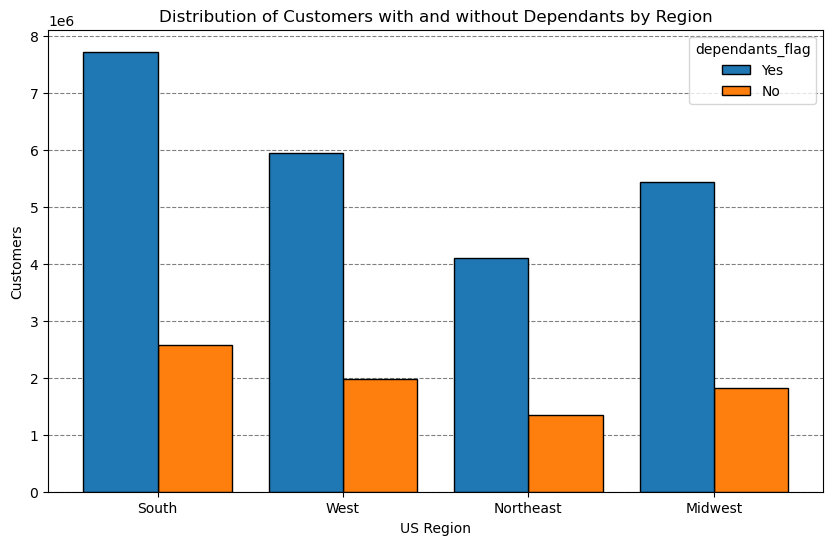

In [62]:
# Create histogram based on number of dependants

plt.figure(figsize=(10, 6))
sns.histplot(data=df_merge, x='region', hue='dependants_flag', multiple='dodge', shrink=.8, alpha=1)

# Overlay a grid behind the bars

plt.gca().set_axisbelow(True)  

# Ensure grid is behind bars

plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting

plt.title('Distribution of Customers with and without Dependants by Region')
plt.ylabel('Customers')
plt.xlabel('US Region')

# Export the viz

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_dependants_by_region.png'), bbox_inches = 'tight')
plt.show()

In [63]:
#8 Crosstab check

pd.crosstab(df_merge['dependants_flag'], df_merge['region'], dropna = False)

region           Midwest  Northeast    South     West
dependants_flag                                      
No               1822816    1354482  2581933  1980450
Yes              5438697    4110203  7729206  5946777

# Age Groups

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a

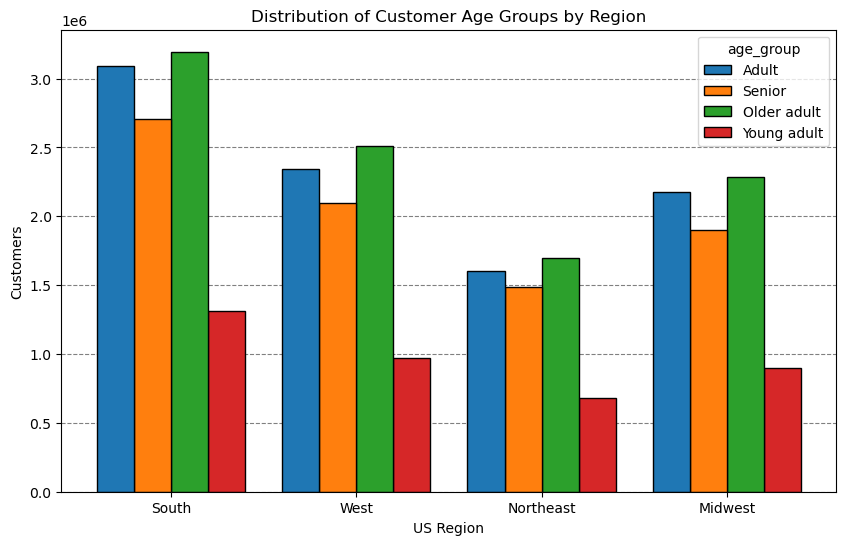

In [64]:
# Create histogram

plt.figure(figsize=(10, 6))
sns.histplot(data=df_merge, x='region', hue='age_group', multiple='dodge', shrink=.8, alpha=1)

# Overlay a grid behind the bars

plt.gca().set_axisbelow(True)  

# Ensure grid is behind bars

plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting

plt.title('Distribution of Customer Age Groups by Region')
plt.ylabel('Customers')
plt.xlabel('US Region')

# Export viz

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_age_groups_by_region.png'), bbox_inches = 'tight')
plt.show()

In [65]:
#8 Crosstab check

pd.crosstab(df_merge['age_group'], df_merge['region'], dropna = False)

region       Midwest  Northeast    South     West
age_group                                        
Adult        2172833    1602358  3092723  2346537
Older adult  2286479    1697611  3194966  2510995
Senior       1904046    1484807  2708461  2098230
Young adult   898155     679909  1314989   971465

# Department popularity

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a

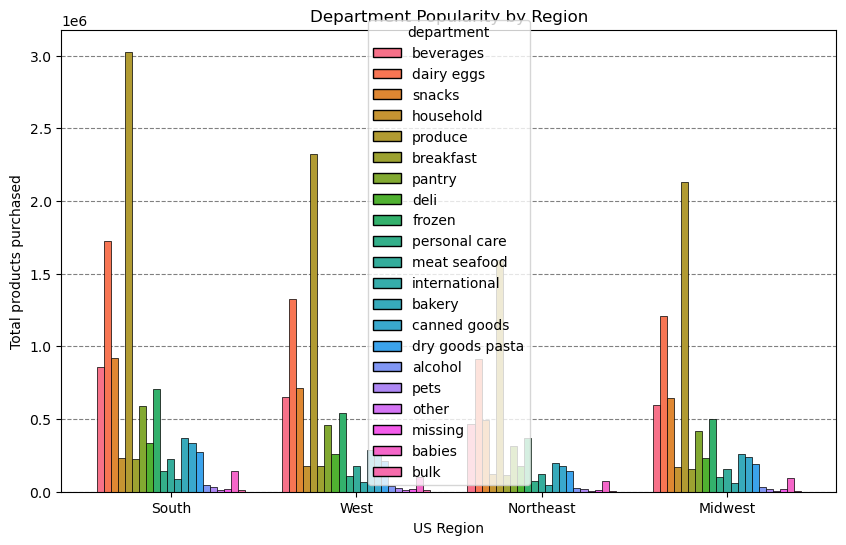

In [66]:
# Create histogram

plt.figure(figsize=(10, 6))
sns.histplot(data=df_merge, x='region', hue='department', multiple='dodge', shrink=.8, alpha=1)

# Overlay a grid behind the bars

plt.gca().set_axisbelow(True)  

# Ensure grid is behind bars

plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting

plt.title('Department Popularity by Region')
plt.ylabel('Total products purchased')
plt.xlabel('US Region')

# Export viz

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_department_popularity_by_region.png'), bbox_inches = 'tight')
plt.show()

In general, every region purchases produce more than the rest. The second most popular is beverage. Then dairy, snacks, frozen and so on. The South region has more purchasing power than the other regions.

In [67]:
#8 Crosstab check

pd.crosstab(df_merge['department'], df_merge['region'], dropna = False)

region           Midwest  Northeast    South     West
department                                           
alcohol            34043      25017    48813    36754
babies             95741      72712   139511   102428
bakery            261753     199300   371620   288155
beverages         598979     462929   859419   650574
breakfast         156155     117904   223172   173619
bulk                7929       5599    11180     8743
canned goods      237459     176936   337458   260221
dairy eggs       1212490     914616  1723016  1327060
deli              234464     178398   333620   257352
dry goods pasta   193463     143817   272813   212043
frozen            498225     370436   709906   543164
household         166992     124604   230061   178200
international      60666      44678    84649    65998
meat seafood      158260     118571   224120   173830
missing            15563      11512    21787    15906
other               7983       6268    11579     8581
pantry            420334     312731   591754   457886
personal care     100398      74765   142496   106647
pets               21358      17734    29909    24059
produce          2134115    1593004  3027476  2324678
snacks            645143     493154   916780   711329

# 10. Export the final data set

In [68]:
df_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_full.pkl'))

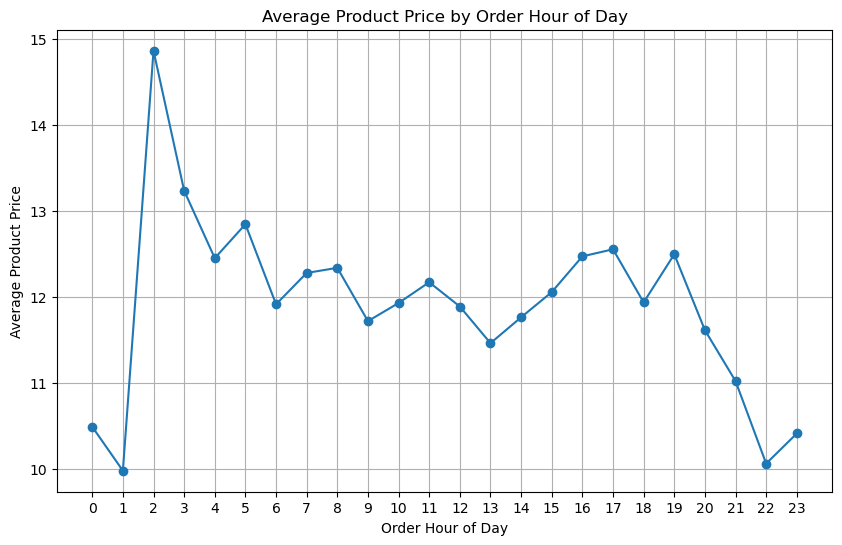

In [71]:
avg_price_per_hour = df_merge.groupby('order_hour_of_day')['prices'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(avg_price_per_hour['order_hour_of_day'], avg_price_per_hour['prices'], marker='o')
plt.title('Average Product Price by Order Hour of Day')
plt.xlabel('Order Hour of Day')
plt.ylabel('Average Product Price')
plt.grid(True)
plt.xticks(range(24)) 

# Export viz

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_avg_product_price_by_hour.png'), bbox_inches = 'tight')
plt.show()

<Figure size 1000x600 with 0 Axes>

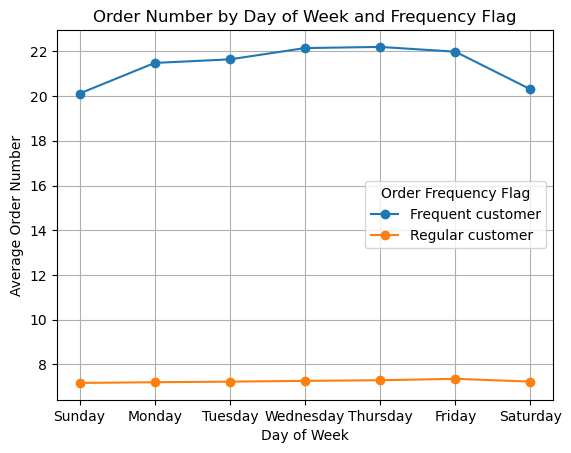

In [72]:
# Group by 'orders_day_of_week' and 'order_frequency_flag', then calculate the average 'order_number'
grouped_data = df.groupby(['orders_day_of_week', 'order_frequency_flag'])['order_number'].mean().unstack()

# Plotting
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='line', marker='o')
plt.title('Order Number by Day of Week and Frequency Flag')
plt.xlabel('Day of Week')
plt.ylabel('Average Order Number')
plt.grid(True)
plt.legend(title='Order Frequency Flag')
plt.xticks(range(7), ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])  # Assuming 0=Sunday, 6=Saturday

# Export viz

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_number_vs_day_of_week_frequency_flag.png'), bbox_inches = 'tight')
plt.show()

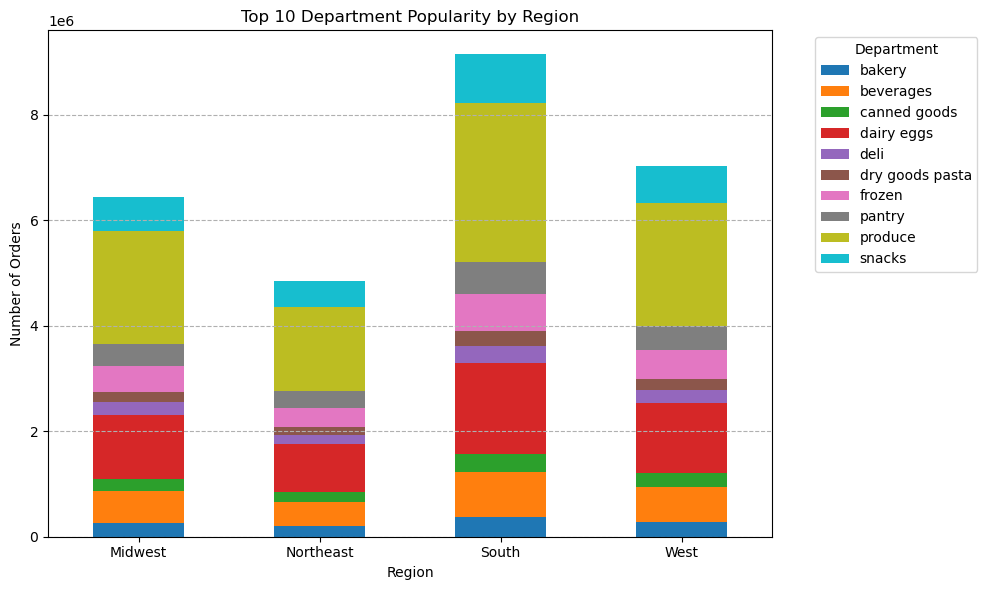

In [76]:
# Group by 'department' to find the top 10 most popular departments overall
top_departments = df_merge['department'].value_counts().head(10).index

# Filter the original DataFrame to include only these top 10 departments
filtered_df = df_merge[df_merge['department'].isin(top_departments)]

# Group by 'region' and 'department', and count the occurrences
grouped_data = filtered_df.groupby(['region', 'department']).size().unstack().fillna(0)

# Calculate the percentage
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plotting
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Top 10 Department Popularity by Region')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()  # Adjust layout to make room for the legend


plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_popularity_region.png'), bbox_inches = 'tight')
plt.show()

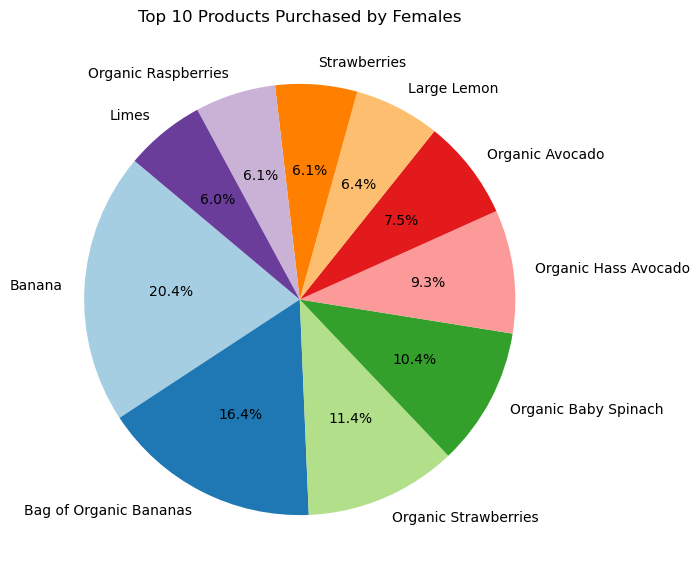

In [77]:
# Filter the data to include only 'Female' gender
female_data = df_merge[df_merge['gender'] == 'Female']

# Group by 'product_name' and count the occurrences
top_products = female_data['product_name'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 7))
top_products.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Products Purchased by Females')
plt.ylabel('')  # Hide the y-label

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_top_10_products_female.png'), bbox_inches = 'tight')
plt.show()

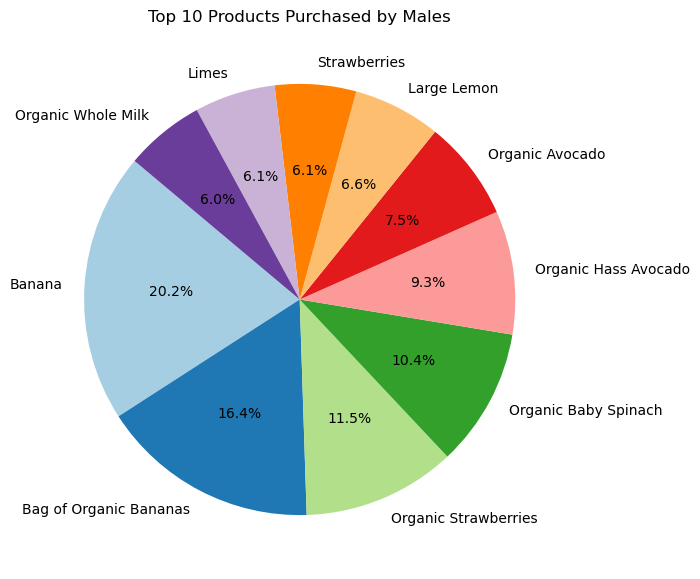

In [78]:
# Filter the data to include only 'Female' gender
male_data = df_merge[df_merge['gender'] == 'Male']

# Group by 'product_name' and count the occurrences
top_products = male_data['product_name'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 7))
top_products.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Products Purchased by Males')
plt.ylabel('')  # Hide the y-label

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_top_10_products_male.png'), bbox_inches = 'tight')
plt.show()

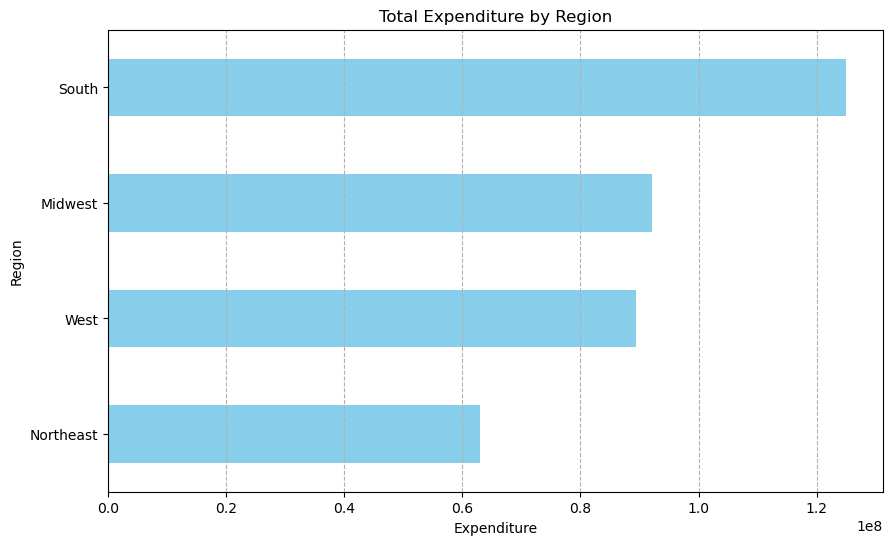

In [80]:
# Group by 'region' and sum the 'prices'
total_prices_by_region = df_merge.groupby('region')['prices'].sum().sort_values()

# Plotting
plt.figure(figsize=(10, 6))
total_prices_by_region.plot(kind='barh', color='skyblue')
plt.title('Total Expenditure by Region')
plt.xlabel('Expenditure')
plt.ylabel('Region')
plt.grid(axis='x', linestyle='--')

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_total_expenditure_region.png'), bbox_inches = 'tight')
plt.show()

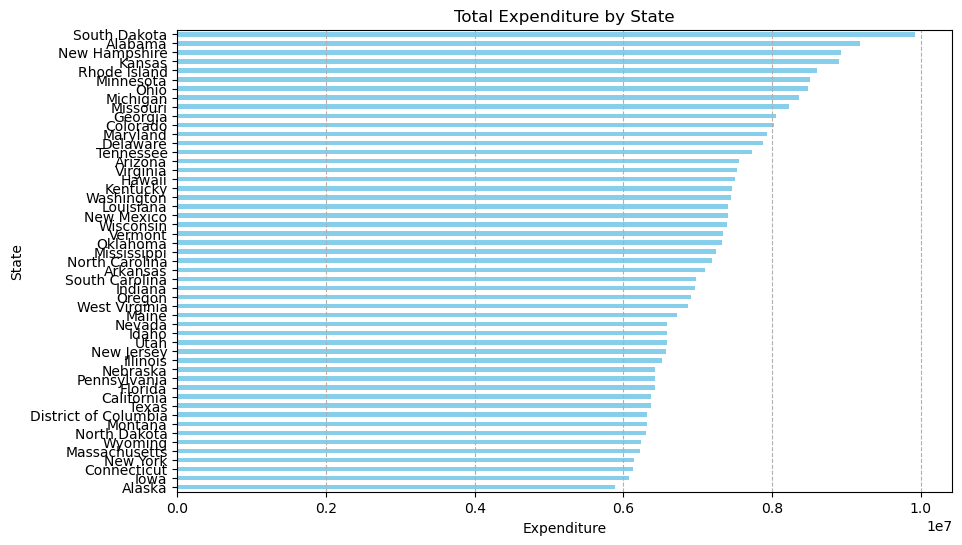

In [81]:
# Group by 'state' and sum the 'prices'
total_prices_by_state = df_merge.groupby('state')['prices'].sum().sort_values()

# Plotting
plt.figure(figsize=(10, 6))
total_prices_by_state.plot(kind='barh', color='skyblue')
plt.title('Total Expenditure by State')
plt.xlabel('Expenditure')
plt.ylabel('State')
plt.grid(axis='x', linestyle='--')

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_total_expenditure_state.png'), bbox_inches = 'tight')
plt.show()